In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
X, Y = data.drop(columns="label").values, data["label"].values

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = Y.reshape(len(Y), 1)
y = onehot_encoder.fit_transform(integer_encoded)
# print(y.shape)

# Visualize Data

Y = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


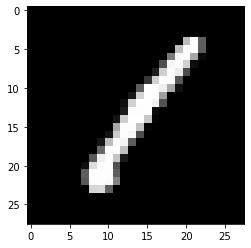

In [5]:
n = 0
print("Y = "+ str(y[n]))
plt.imshow(X[n].reshape(28,28), cmap='gray')

# Flatten Data

In [6]:
X.shape  # Already Flattened

(42000, 784)

In [7]:
X = X.reshape(-1,28,28,1)

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [27]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = .85, random_state = 1)

Y = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


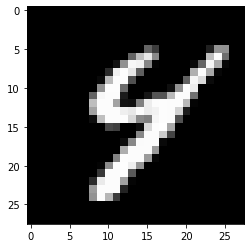

In [28]:
n = 5
print("Y = "+ str(train_y[n]))
plt.imshow(train_x[n].reshape(28,28), cmap='gray')

In [29]:
from keras import layers
# has Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

In [30]:
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(test_x.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 35700
number of test examples = 6300
X_train shape: (35700, 28, 28, 1)
Y_train shape: (35700, 10)
X_test shape: (6300, 28, 28, 1)
Y_test shape: (6300, 10)


In [31]:
def lenet(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]

    Returns:
    model -- a Model() instance in Keras
    """
    
    X_input = layers.Input(input_shape)
    
    X = layers.ZeroPadding2D((2,2))(X_input) # Intial size was (28,28) but in model (32,32)
    X = layers.Conv2D(6, (5,5), strides = (1,1), name = "conv1")(X)
    X = layers.MaxPooling2D((2,2), strides = (2,2), name = "pool1")(X)
    X = layers.Conv2D(16, (5,5), strides = (1,1), name = "conv2")(X)
    X = layers.MaxPooling2D((2,2), strides = (2,2), name = "pool2")(X)
    
    X = layers.Flatten()(X)
    X = layers.Dense(120, activation='relu', name='fc1')(X)
    X = layers.Dense(84, activation='relu', name='fc2')(X)
    X = layers.Dense(10, activation='softmax', name='sMax')(X)
    
    lenet_model = Model(inputs = X_input, outputs = X, name = "LeNet")
    
    
    return lenet_model

In [32]:
digitRecog = lenet(train_x.shape[1:])
digitRecog.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [33]:
digitRecog.fit(train_x, train_y, batch_size = 256, epochs = 10)

Epoch 1/10
35700/35700 [==============================] - 7s 198us/step - loss: 1.9064 - accuracy: 0.8100
Epoch 2/10
35700/35700 [==============================] - 7s 187us/step - loss: 0.2953 - accuracy: 0.9298
Epoch 3/10
35700/35700 [==============================] - 8s 221us/step - loss: 0.1691 - accuracy: 0.9557
Epoch 4/10
35700/35700 [==============================] - 9s 242us/step - loss: 0.1060 - accuracy: 0.9697
Epoch 5/10
35700/35700 [==============================] - 9s 240us/step - loss: 0.0742 - accuracy: 0.9780
Epoch 6/10
35700/35700 [==============================] - 9s 249us/step - loss: 0.0530 - accuracy: 0.9835
Epoch 7/10
35700/35700 [==============================] - 9s 242us/step - loss: 0.0382 - accuracy: 0.9879
Epoch 8/10
35700/35700 [==============================] - 9s 241us/step - loss: 0.0245 - accuracy: 0.9928
Epoch 9/10
35700/35700 [==============================] - 9s 244us/step - loss: 0.0168 - accuracy: 0.9950
Epoch 10/10
35700/35700 [=====================

# Evaluation

In [34]:
predictions = digitRecog.evaluate(test_x, test_y)

print("\n\n")
print("Loss = " + str(predictions[0]))
print("Test Accuracy = " + str(predictions[1]))

6300/6300 [==============================] - 1s 134us/step



Loss = 0.16921482347730835
Test Accuracy = 0.9630158543586731
